In [45]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [46]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")
keys = pd.read_csv("gender_submission.csv")

In [47]:
test = pd.DataFrame(test_data)
train = pd.DataFrame(train_data)
key = pd.DataFrame(keys)
train.head()
train.describe()
train['Age'].median()

28.0

In [48]:
test_median = test['Age'].median()

# Cleaning and exploring data

In [49]:
print(pd.isna(train).any())

train = train[train.Age.notnull()]

train.count()

train = train.drop(['Cabin', 'Embarked', 'Ticket'], axis = 1)
train
train.head()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [50]:
train.groupby(['Survived','Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Fare
Survived Sex                                                       
0        female           64      64    64   64     64     64    64
         male            360     360   360  360    360    360   360
1        female          197     197   197  197    197    197   197
         male             93      93    93   93     93     93    93

## Create groups for age column

In [51]:

conditions = [(train['Age'] <= 10), 
              (train['Age'] >10) & (train['Age']<= 20),
              (train['Age'] >20) & (train['Age']<= 30),
              (train['Age'] >30) & (train['Age']<= 40),
              (train['Age'] >40) & (train['Age']<= 50),
              (train['Age'] >50) & (train['Age']<= 60),
              (train['Age'] >60) & (train['Age']<= 70),
              (train['Age'] >70) & (train['Age']<= 80),
              (train['Age'] >80)] 
values = ['<=10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']
train['age_categ'] = np.select(conditions, values)


# Create groups for fair column

In [52]:
conditions_fares = [(train['Fare'] <= 40), 
                   (train['Fare'] >40) & (train['Fare']<= 80),
                   (train['Fare'] >80)]
values_fares = ['<=40', '40-80', '>80']
train['fares_categ'] = np.select(conditions_fares, values_fares)

# Create column with name alias

In [53]:
train['name_title'] = train.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

train['name_title'].unique()

conditions_name = [(train['name_title'] == 'Mrs'),
                   (train['name_title'] == 'Miss'),
                   (train['name_title'] == 'Master'),
                   (train['name_title'] == 'Mr'),
                   (train['name_title'] != 'Mrs') & (train['name_title'] != 'Miss') & (train['name_title'] != 'Master') & (train['name_title'] != 'Mr') ]
values_name = ['Mrs', 'Miss', 'Master', 'Mr', 'Other']

train['name_title'] = np.select(conditions_name, values_name)

### Replace median fare instead 0 values

In [96]:
conditions_name = [(train['Pclass'] == 1),
                   (train['Pclass'] == 2),
                   (train['Pclass'] == 3)]

#subset_fare = train.groupby('Pclass').agg(Mean = ('Fare', 'mean'))
subset_fare.head()
values_name = subset_fare['Mean']


,Mean
Pclass,
1,87.961582
2,21.471556
3,13.229435


# Exploring data

In [54]:
subset_1 = train[['Survived','Age','Sex']]
mens = subset_1[subset_1.Sex == 'male'].count()
womans = subset_1[subset_1.Sex == 'female'].count()

alive_people = train[train.Survived == 1]
death_people = train[train.Survived == 0]

count_alive = alive_people['Age'].count()
count_death = death_people['Age'].count()
prcent_of_ailived = (count_alive/train['Age'].count())*100
prcent_of_death = (count_death/train['Age'].count())*100

male_alive = subset_1[(subset_1.Sex == 'male')&(subset_1.Survived == 1)]
male_death = subset_1[(subset_1.Sex == 'male')&(subset_1.Survived == 0)]
female_alive = subset_1[(subset_1.Sex == 'female')&(subset_1.Survived == 1)]
female_death = subset_1[(subset_1.Sex == 'female')&(subset_1.Survived == 0)]

print('Count_of_mens:',mens)
print('Count_of_womans:',womans)


Count_of_mens: Survived    453
Age         453
Sex         453
dtype: int64
Count_of_womans: Survived    261
Age         261
Sex         261
dtype: int64


93


Text(0, 0.5, 'Count')

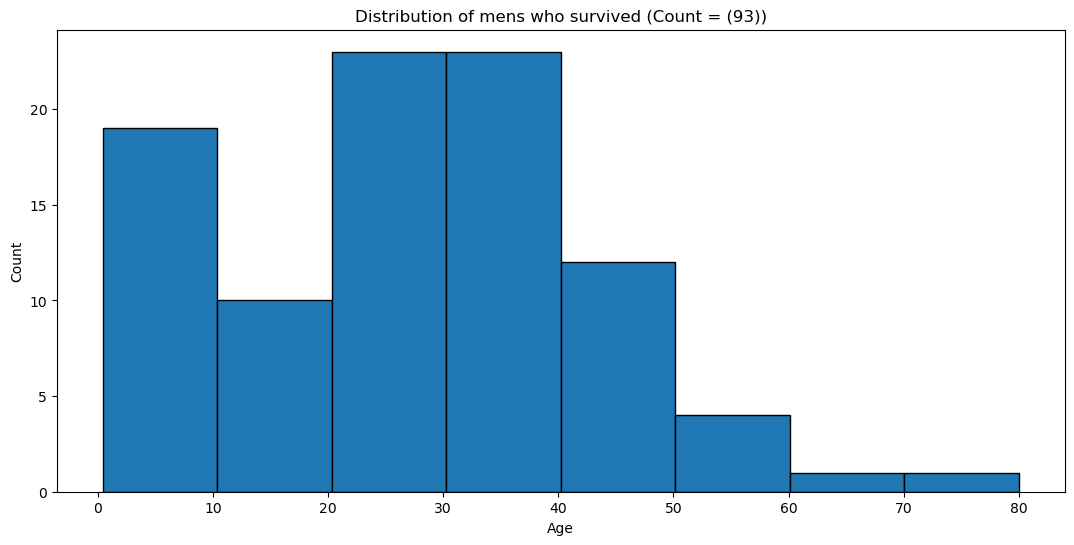

In [55]:
# Distribution of men`s age hwo survived
mens_survived = male_alive['Age'].count()
print(mens_survived)

plt.figure(figsize = (13,6))
plt.hist( male_alive['Age'], ec = 'black', bins = 8)
plt.title(f"Distribution of mens who survived (Count = ({mens_survived}))")
plt.xlabel("Age")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

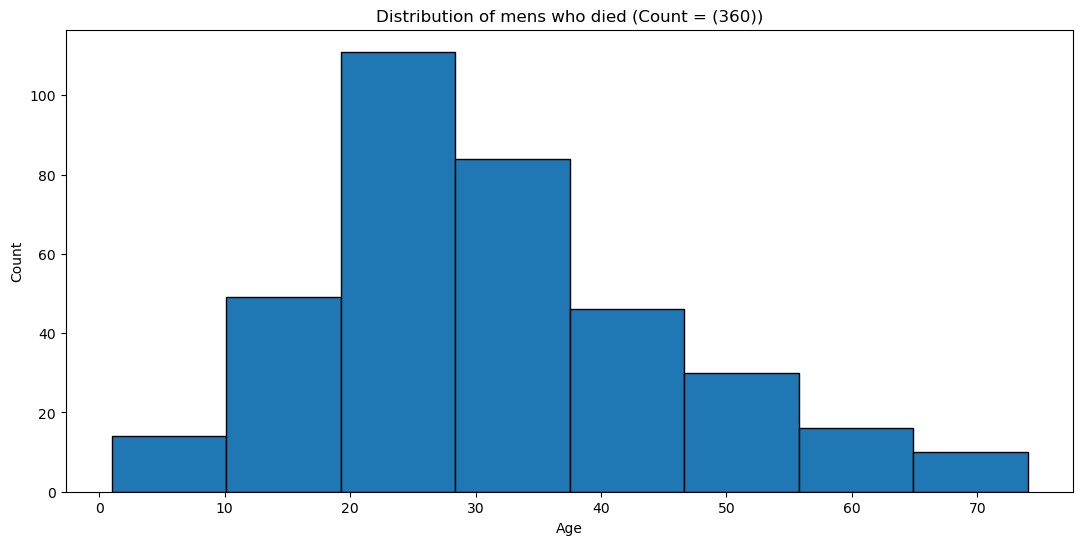

In [56]:
# Distribution of men`s age hwo died
mens_died = male_death['Age'].count()
plt.figure(figsize = (13,6))
plt.hist( male_death['Age'], ec = 'black', bins = 8)
plt.title(f"Distribution of mens who died (Count = ({mens_died}))")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

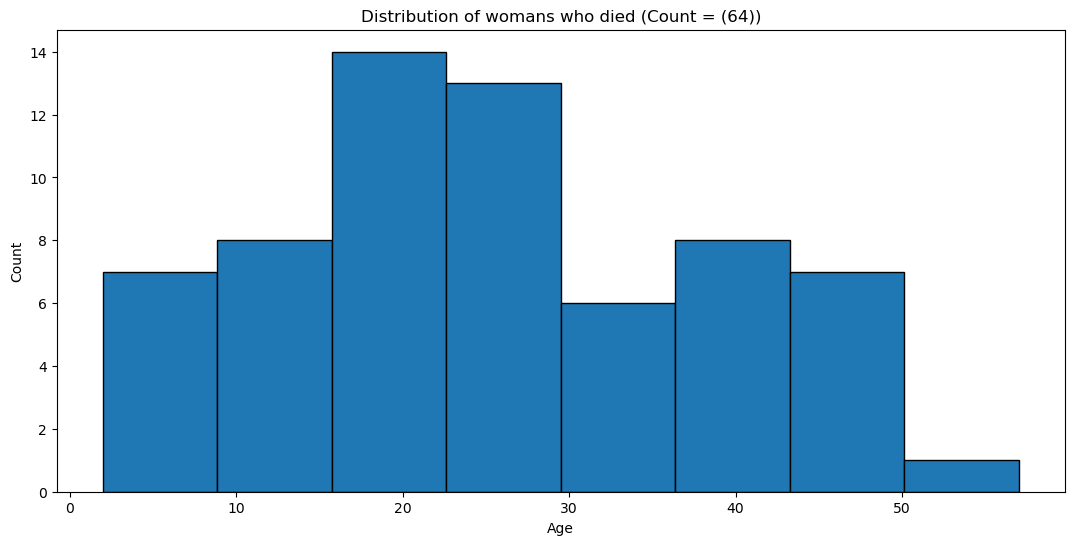

In [57]:
# Distribution of woman`s age hwo died
womans_died = female_death['Age'].count()
plt.figure(figsize = (13,6))
plt.hist( female_death['Age'], ec = 'black', bins = 8)
plt.title(f"Distribution of womans who died (Count = ({womans_died}))")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

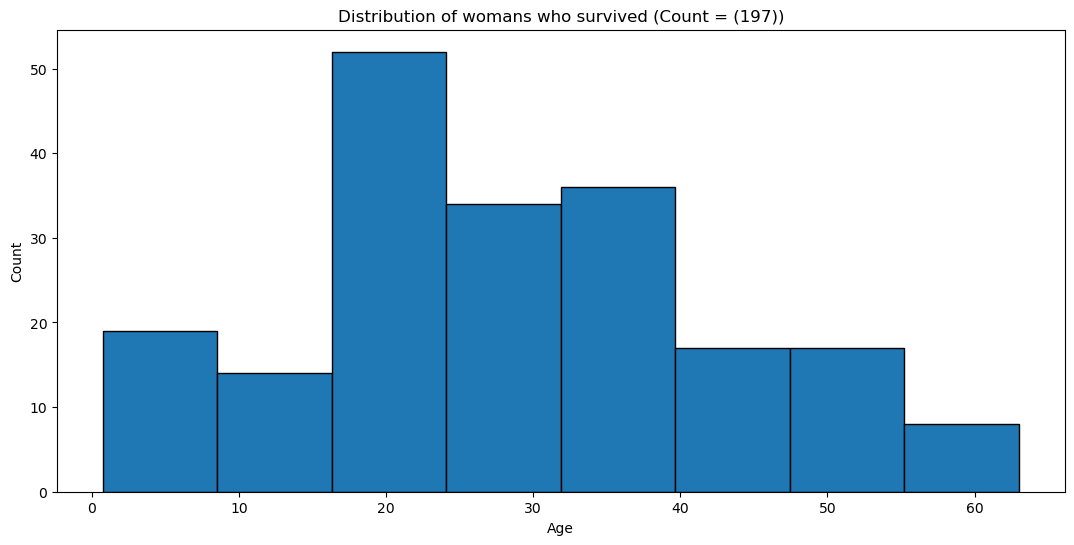

In [58]:
# Distribution of woman`s age hwo survived
womans_survived = female_alive['Age'].count()
plt.figure(figsize = (13,6))
plt.hist( female_alive['Age'], ec = 'black', bins = 8)
plt.title(f"Distribution of womans who survived (Count = ({womans_survived}))")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0.5, 1.0, 'Age distribution of people who alive (Percent_of_alived = (40.61624649859944) %)')

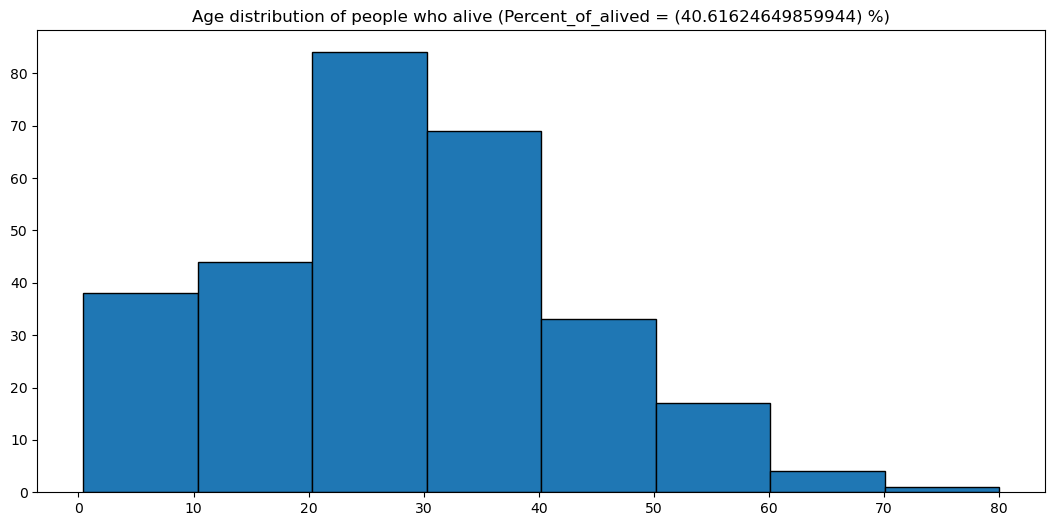

In [59]:
plt.figure(figsize = (13,6))
plt.hist(alive_people['Age'], ec = 'black', bins = 8)
plt.title (f'Age distribution of people who alive (Percent_of_alived = ({prcent_of_ailived}) %)')

Text(0.5, 1.0, 'Age distribution of people who death (Percent_of_death = (59.38375350140056) %)')

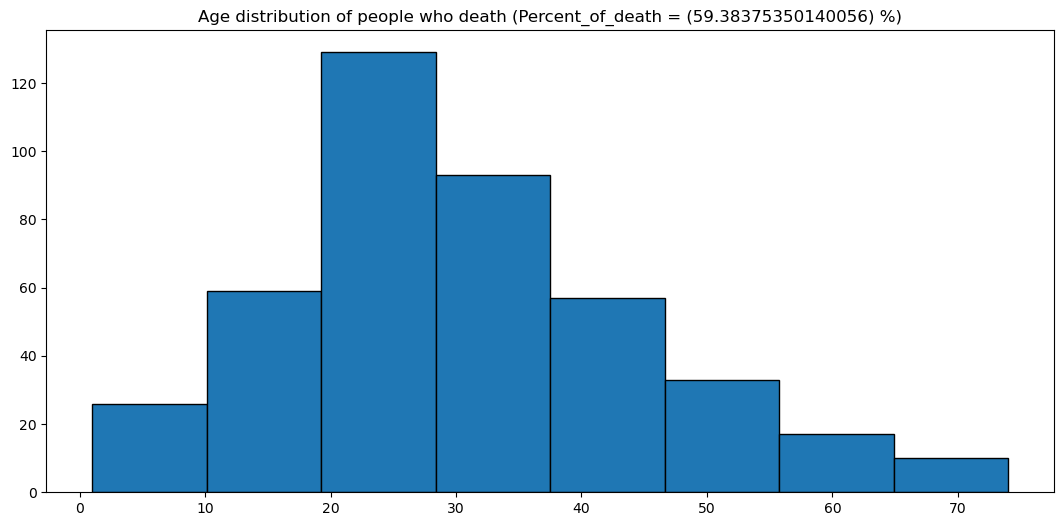

In [60]:
plt.figure(figsize = (13,6))
plt.hist(death_people['Age'], ec = 'black', bins = 8)
plt.title (f'Age distribution of people who death (Percent_of_death = ({prcent_of_death}) %)')

# Exploring age of people who survived

In [61]:
subset_2 = train[['age_categ', 'Age']].groupby('age_categ').agg(Total_count = ('Age', 'count'))
#subset_2.head()

subset_3 = alive_people[['age_categ', 'Age']].groupby('age_categ').agg(Count_alive = ('Age', 'count')) 
#subset_3.head()

total_age_table = pd.merge(subset_2, subset_3, how = 'left',on = ['age_categ'])

total_age_table['Count_death'] = total_age_table['Total_count']-total_age_table['Count_alive']

total_age_table['Percent_of_alive'] = total_age_table['Count_alive']/total_age_table['Total_count']

total_age_table.head(12)



,Total_count,Count_alive,Count_death,Percent_of_alive
age_categ,,,,
11-20,115,44,71,0.382609
21-30,230,84,146,0.365217
31-40,155,69,86,0.445161
41-50,86,33,53,0.383721
51-60,42,17,25,0.404762
61-70,17,4,13,0.235294
71-80,5,1,4,0.200000
<=10,64,38,26,0.593750


Text(0, 0.5, 'Category')

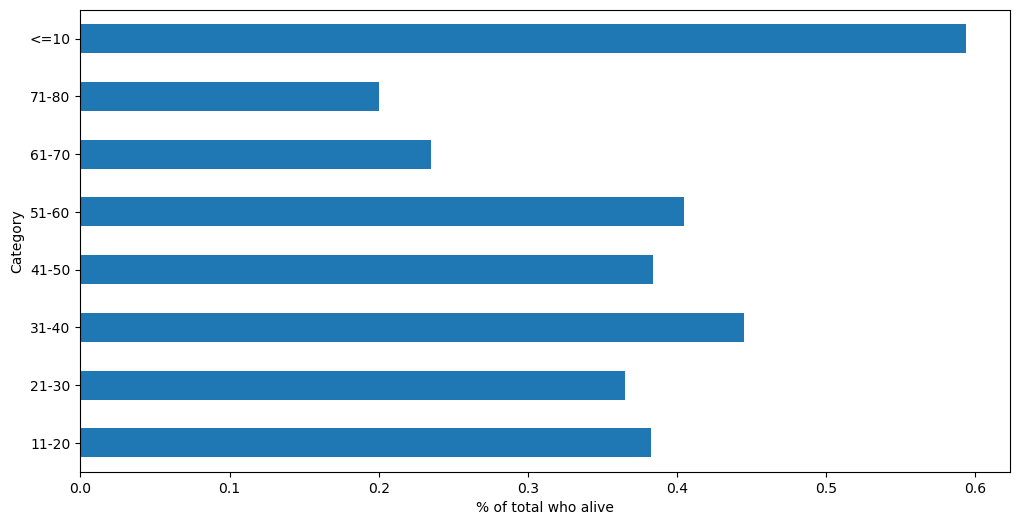

In [62]:
plt.figure(figsize = (12,6))
total_age_table['Percent_of_alive'].plot.barh()
plt.xlabel('% of total who alive')
plt.ylabel('Category')

# Explore data about tickets class 

In [63]:
subset_4 = alive_people.groupby('Pclass').agg(Count_of_alive_people = ('PassengerId', 'count'))

subset_5 = train.groupby('Pclass').agg(Total_count = ('PassengerId', 'count'))

p_class_table = pd.merge(subset_4, subset_5,on = ['Pclass'])
p_class_table.head()

p_class_table['Percent who survived'] = p_class_table['Count_of_alive_people']/p_class_table['Total_count']

Text(0, 0.5, 'Class of ticket')

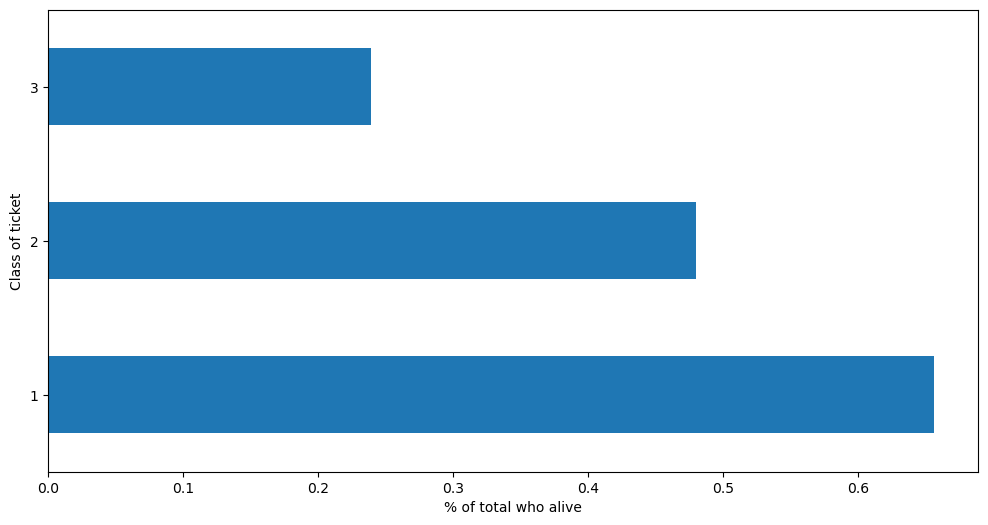

In [64]:
plt.figure(figsize = (12,6))
p_class_table['Percent who survived'].plot.barh()
plt.xlabel('% of total who alive')
plt.ylabel('Class of ticket')

# Explore data about count of members in family

In [65]:
subset_6 = train.groupby('SibSp').agg(Total_count = ('PassengerId', 'count'))

subset_7 = alive_people.groupby('SibSp').agg(Survived_people = ('PassengerId', 'count'))

sibsp_table = pd.merge(subset_6, subset_7, on = ['SibSp'])
sibsp_table.head()

sibsp_table['Percent who survived'] = sibsp_table['Survived_people']/sibsp_table['Total_count']

Text(0, 0.5, 'Class of ticket')

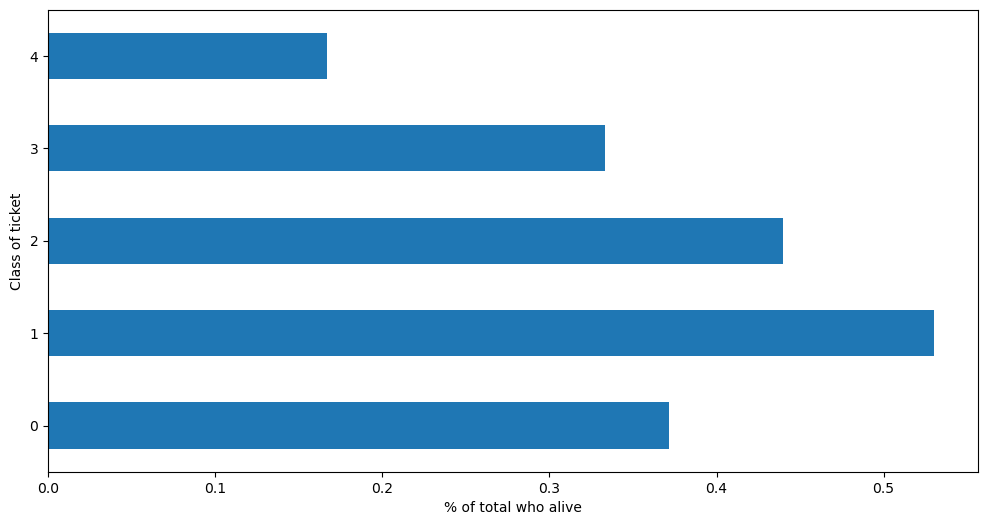

In [66]:
plt.figure(figsize = (12,6))
sibsp_table['Percent who survived'].plot.barh()
plt.xlabel('% of total who alive')
plt.ylabel('Class of ticket')

# Explore data about fees

In [67]:
subset_8 = train.groupby('fares_categ').agg(Total_count = ('PassengerId', 'count'))

subset_9 = alive_people.groupby('fares_categ').agg(Survived_people = ('PassengerId', 'count'))

fare_table = pd.merge(subset_8, subset_9, on = ['fares_categ'])

fare_table['Percent who survived'] = fare_table['Survived_people']/fare_table['Total_count']

fare_table.head()

,Total_count,Survived_people,Percent who survived
fares_categ,,,
40-80,85,50,0.588235
<=40,562,188,0.334520
>80,67,52,0.776119


Text(0, 0.5, 'Class of ticket')

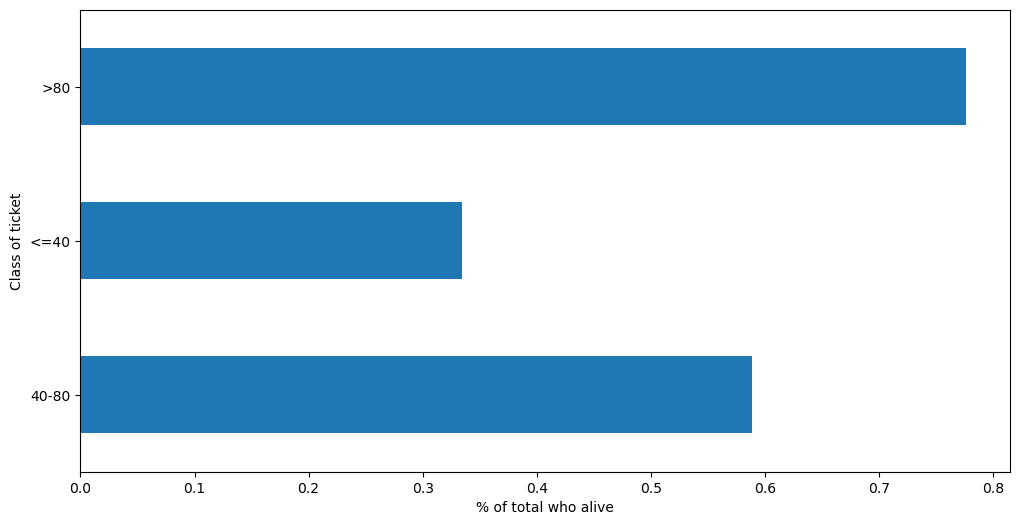

In [68]:
plt.figure(figsize = (12,6))
fare_table['Percent who survived'].plot.barh()
plt.xlabel('% of total who alive')
plt.ylabel('Class of ticket')

# Explore data about name alias

In [69]:
subset_10 = train.groupby('name_title').agg(Total_count = ('PassengerId', 'count'))

subset_11 = alive_people.groupby('name_title').agg(Survived_people = ('PassengerId', 'count'))

namealias_table = pd.merge(subset_10, subset_11, on = ['name_title'])

namealias_table['Percent who survived'] = namealias_table['Survived_people']/namealias_table['Total_count']

namealias_table.head()

,Total_count,Survived_people,Percent who survived
name_title,,,
Master,36,21,0.583333
Miss,146,105,0.719178
Mr,398,67,0.168342
Mrs,108,85,0.787037
Other,26,12,0.461538


Text(0, 0.5, 'Class of ticket')

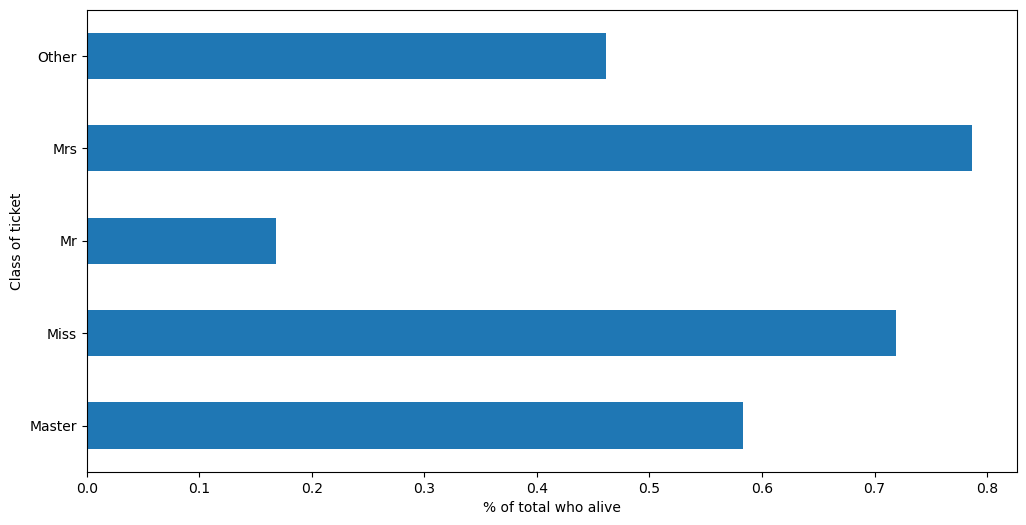

In [70]:
plt.figure(figsize = (12,6))
namealias_table['Percent who survived'].plot.barh()
plt.xlabel('% of total who alive')
plt.ylabel('Class of ticket')

### Replacing text data

In [71]:
NameColumnDummy = pd.get_dummies(train['name_title'])

print(NameColumnDummy)

SexColumnDummies = pd.get_dummies(train['Sex'])

print(SexColumnDummies)


     Master  Miss  Mr  Mrs  Other
0         0     0   1    0      0
1         0     0   0    1      0
2         0     1   0    0      0
3         0     0   0    1      0
4         0     0   1    0      0
..      ...   ...  ..  ...    ...
885       0     0   0    1      0
886       0     0   0    0      1
887       0     1   0    0      0
889       0     0   1    0      0
890       0     0   1    0      0

[714 rows x 5 columns]
     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
885       1     0
886       0     1
887       1     0
889       0     1
890       0     1

[714 rows x 2 columns]


In [72]:
train_x = pd.concat([train, NameColumnDummy, SexColumnDummies], axis = 1)
train_x.describe()
train_x.head()

train_x = train_x.drop(['Name', 'Sex', 'age_categ', 'fares_categ', 'name_title'] , axis = 1) 

# Decision Tree

In [86]:
y_train = train_x['Survived']

train_x = train_x.drop('Survived', axis = 1)

train_x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Other,female,male
0,1,3,22.0,1,0,7.2500,0,0,1,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,1,0,1,0
2,3,3,26.0,0,0,7.9250,0,1,0,0,0,1,0
3,4,1,35.0,1,0,53.1000,0,0,0,1,0,1,0
4,5,3,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [87]:
from sklearn import tree
rf_clf = tree.DecisionTreeClassifier(max_depth=5)
model = rf_clf.fit(train_x, y_train)
print(rf_clf.score(train_x, y_train))

0.8725490196078431


# Prepare test data

In [88]:
test.head()
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [89]:
test['Age'].fillna(test_median, inplace=True)

In [90]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [91]:
print(test[test.Fare == 0])

     PassengerId  Pclass                                   Name   Sex   Age  \
266         1158       1  Chisholm, Mr. Roderick Robert Crispin  male  27.0   
372         1264       1                Ismay, Mr. Joseph Bruce  male  49.0   

     SibSp  Parch  Ticket  Fare        Cabin Embarked  
266      0      0  112051   0.0          NaN        S  
372      0      0  112058   0.0  B52 B54 B56        S  


In [92]:
train_x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Other,female,male
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,2.236695,29.699118,0.512605,0.431373,34.694514,0.050420,0.204482,0.557423,0.151261,0.036415,0.365546,0.634454
std,259.119524,0.838250,14.526497,0.929783,0.853289,52.918930,0.218964,0.403605,0.497040,0.358554,0.187451,0.481921,0.481921
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,677.750000,3.000000,38.000000,1.000000,1.000000,33.375000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
